# Исследование надежности заемщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

#### 1.   Откроем таблицу и изучим информацию о данных, импортируем библиотеку pandas, считаем данные из csv-файла в датафрейм и сохраним в переменную `data`

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')


#### 2. Выведем на экран первые 10 строчек датафрейма и основную информацию о нем.


In [2]:
def get_info(data):
    data.columns = [x.lower().replace(' ', '_') for x in data.columns] # переименование столбцов по правилам  snake_case
    display(data.head())# первые 5 строка датасета
    display(data.info()) # общая информация
    display(data.describe()) # описание датасета
    display(data.value_counts()) # подсчет уникальных значений
    display("Количество явных дубликатов", data.duplicated().sum()) # проверка явных дубликатов


In [3]:
get_info(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


children  days_employed   dob_years  education  education_id  family_status     family_status_id  gender  income_type  debt  total_income   purpose                              
-1        -9851.184337    44         среднее    1             в разводе         3                 F       сотрудник    0     110990.810581  свой автомобиль                          1
 1        -7117.338200    42         среднее    1             женат / замужем   0                 F       госслужащий  0     228199.252819  ремонт жилью                             1
          -7137.319761    35         среднее    1             женат / замужем   0                 F       сотрудник    0     129352.711834  недвижимость                             1
          -7146.299384    50         высшее     0             женат / замужем   0                 F       сотрудник    0     104888.625546  операции с жильем                        1
          -7152.420165    49         среднее    1             женат / замужем   0         

'Количество явных дубликатов'

54

Датасет содержит 21 525 строк и 12 колонок:
 
 - children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

 
Можно  отметить следующее:

- в столбце total_income есть пропуски и неверный тип данных - вещественый вместо цельночисленного;
- в столбце days_employed помимо пропусков есть отрицательные значения
- в столбце children есть отрицательные значения 
- в датасете 54 явных дубликата

Устраним далее эти несоответсвия.



### Предобработка данных

#### 3. Выведим количество пропущенных значений в  столбцах 

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

#### 4. Устраним несоответствия в столбце total_income.

В столбцах days_employed и total_income были допущены пропуски  по 2174 строкам из 21 525, то есть 
пропуски присутствовали в 10% строк.  Наиболее частыми причинами появления пропусков в исходных данных является человеческий фактор и технические ошибки. Если эти пропуски были допущены в одних и тех же  строках, то можно предположить , что заёмщик не работает(пенсионер) или по какой-то причине не может или не хочет указывать эти данные, например,если работает неофициально. 

Столбец total_income (ежемесячный доход) является ключевым для приводимого исследования, и обработка пропусков в нем, методом заполнения нулями или удалением (игнорирование) могло привести к существенному искажению данных. Таким образом заполнение пропусков медианными значениями в данном случае будет одним из самых простых и надёжных. На сумму дохода сильнее всего влияет тип занятости,  заполним пропуски в этом столбце  медианным значением по каждому типу из столбца `income_type`. 
 

In [5]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i)&(data['total_income'].isna()), 'total_income']=\
    data.loc[(data['income_type'] == i),'total_income'].median()

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`

In [6]:
data['total_income'] = data['total_income'].astype(int)

#### 5. Устраним все аномалии в столбце days_employed

В столбце days_employed присутствуют отрицательные значения  количества дней трудового стажа, для реальных данных это ненормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода abs().

In [7]:
data['days_employed'] = data['days_employed'].abs() 

Теперь заполним пропуски в столбце days_employed медианными значениями по каждому типу занятости income_type.

In [8]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i)&(data['days_employed'].isna()), 'days_employed']=\
    data.loc[(data['income_type'] == i),'days_employed'].median()

Для каждого типа занятости выведите медианное значение трудового стажа days_employed в днях.

In [9]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

Заполним пропуски в столбце days_employed медианными значениями по каждому типу занятости income_type и проверим, что все пропуски заполнены

In [10]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i)&(data['days_employed'].isna()), 'days_employed']=\
    data.loc[(data['income_type'] == i),'days_employed'].median()
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

#### 5. Обработаем аномалии в столбце children

Выведем перечень уникальных значений столбца children.

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children есть два аномальных значения - "-1" и "20" . Удалим строки, в которых они встречаются и выведем  перечень уникальных значений столбца children еще раз, чтобы убедиться, что артефакты удалены.

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

#### 6. Обработка дубликатов

В датасете 54 явных дубликата, удалим их

In [13]:
data.drop_duplicates()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


В столбце education столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру и посчитаем еще раз число дубликатов.

In [14]:
data['education']=data['education'].str.lower()
display ("Число явных дубликатов в датасете",data.duplicated().sum())

'Число явных дубликатов в датасете'

71

После смены реестра в столбце education нижния в датасете число явных дубликатов выросло до 71, удалим их

In [15]:
data = data.drop_duplicates()
display ("Число явных дубликатов в датасете",data.duplicated().sum())

'Число явных дубликатов в датасете'

0

#### 7.Категоризация данных

 На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.

In [16]:
def categorize_income(income):
    if income < 30001:
        return 'E'
    if income < 50001:
        return 'D'
    if income < 200001:
        return 'C'
    if income < 1000000:
        return 'B'
    return 'A' # создаем функцию categorize_income()

In [17]:
data['total_income_category'] = data['total_income'].apply(categorize_income)# примените функцию методом apply()

Выведим на экран перечень уникальных целей взятия кредита из столбца purpose.

In [18]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Укрупним категории и создим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

- операции с автомобилем,
- операции с недвижимостью,
- проведение свадьбы,
- получение образовани'.

Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появится строка 'операции с автомобилем'.

Выведем первые 5 строк датасета с новыми категориями.

In [19]:
def categorize_purpose(purpose):
    if 'автомоб' in purpose:
        return 'операции с автомобилем'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'образован' in purpose:
        return 'получение образования'
    return 'операции с недвижимостью'

In [20]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


#### 8. Исследование данных и ответы на вопросыы заказчика

#### 8.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,"дети, количество","просроченные кредиты, количество","просроченные кредиты, сумма","просроченные кредиты, %"
0,0,14091,1063,7.54
1,1,4808,444,9.23
2,2,2052,194,9.45
3,3,330,27,8.18
4,4,41,4,9.76
5,5,9,0,0.00


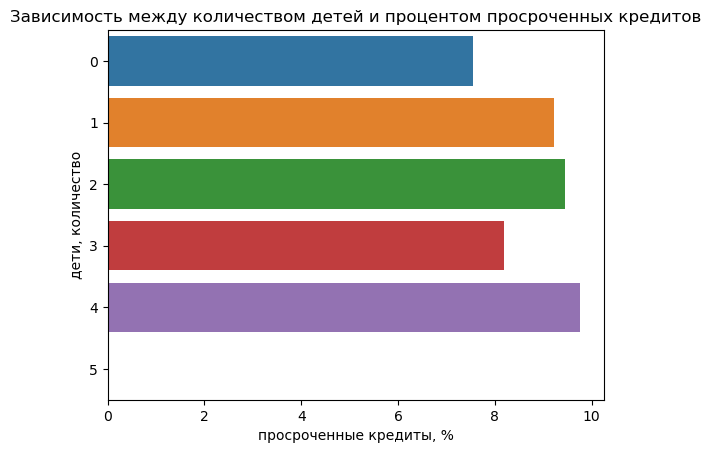

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
data_pivot_kids=data.pivot_table(index=['children'],  values='debt',  aggfunc=['count','sum', 'mean']).reset_index()
data_pivot_kids.columns =['дети, количество','просроченные кредиты, количество', 'просроченные кредиты, сумма', 'просроченные кредиты, %']
data_pivot_kids['просроченные кредиты, %']=round((data_pivot_kids['просроченные кредиты, %']*100),2)
display(data_pivot_kids)

sns.barplot(x=data_pivot_kids['просроченные кредиты, %'], y=data_pivot_kids['дети, количество'], orient= 'h')
plt.title('Зависимость между количеством детей и процентом просроченных кредитов');


**Вывод:**  При исследовании зависимости между количеством детей и возвратом кредита в срок, из приведённых выше можем сделать следующие выводы:
- самый большой процент заёмщиков с просроченными кредитами наблюдается в трех группах  - с четырьмя ,  одним и двумя детьми. Процент задержек по кредитам в этих группах составляет 9,2-9,8 %, самый большой - у заёмщиков с четырьмя детьми.
- в группе заёмщиков с тремя детьми процент просроченных кредитов составил среднее значение в 8,2%
- меньше всего задолженностей по кредитам у заёмщиков без детей - 7,5 %, у заёмщиков с пятью детьми просроченные  кредиты отсутствуют.
- группы  заёмщиков с 3-5 детьми являются  малочисленными и совокупно составляют 1,7% выборки, что говорит о их малозначительности, а значит  анализе данных их влиянием можно пренебречь. Анализируя самые  многочисленные группы с количеством детей 0-2.  можно сделать вывод о  том, что количество детей значительно влияет на возврат кредитов в срок и с ростом количества детей растёт и процент просрочки кредита.

#### 8.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,семейное положение,"просроченные кредиты, количество","просроченные кредиты, сумма","просроченные кредиты, %"
0,Не женат / не замужем,2796,273,9.76
1,в разводе,1189,84,7.06
2,вдовец / вдова,951,63,6.62
3,гражданский брак,4134,385,9.31
4,женат / замужем,12261,927,7.56


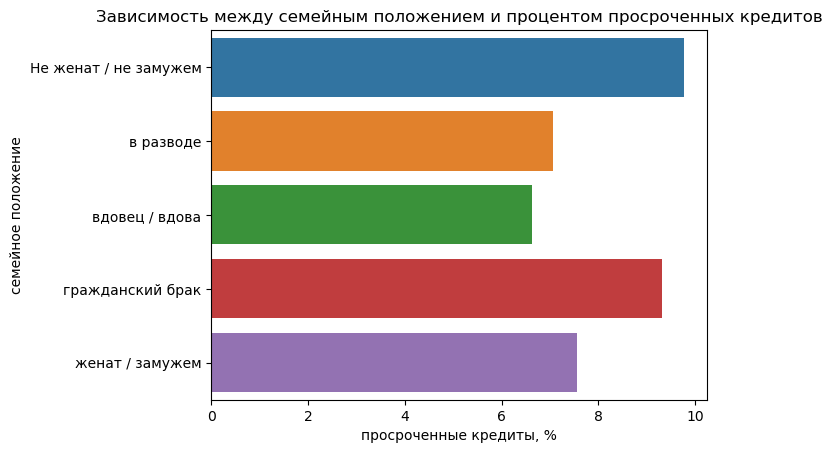

In [22]:
data_pivot_family=data.pivot_table(index=['family_status'],  values='debt',  aggfunc=['count','sum', 'mean']).reset_index()
data_pivot_family.columns =['семейное положение','просроченные кредиты, количество', 'просроченные кредиты, сумма', 'просроченные кредиты, %']
data_pivot_family['просроченные кредиты, %']=round((data_pivot_family['просроченные кредиты, %']*100),2)
display(data_pivot_family)

sns.barplot(x=data_pivot_family['просроченные кредиты, %'], y=data_pivot_family['семейное положение'], orient='h')
plt.title("Зависимость между семейным положением и процентом просроченных кредитов");

**Вывод:** При анализе зависимости между семейным положением и возвратом кредита в срок можно выделить три большие группы со схожим процентом просроченных кредитов:
- заёмщики, не состоящие в официальном браке( категории "Не женат / не замужем" и "гражданский брак"), процент невозврата кредита в срок 9,3-9,8%
- заёмщики, состоящие в официальном браке в данный момент (категория "женат / замужем"), процент невозврата кредита в срок 6,6-7,5%
- заёмщики, состоящие в официальном браке ранее(категории "в разводе" и "вдовец / вдова"), процент невозврата кредита в срок 6,6-7,1%

Из приведённых данных самыми надёжными  являются заёмщики, состоящие в официальном браке в настоящее время  или ранее .

#### 8.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,ежемесячный доход,"просроченные кредиты, количество","просроченные кредиты, сумма","просроченные кредиты, %","дети, всего"
0,A,2,25,8.00,18
1,B,354,5014,7.06,2483
2,C,1353,15921,8.50,7450
3,D,21,349,6.02,154
4,E,2,22,9.09,6


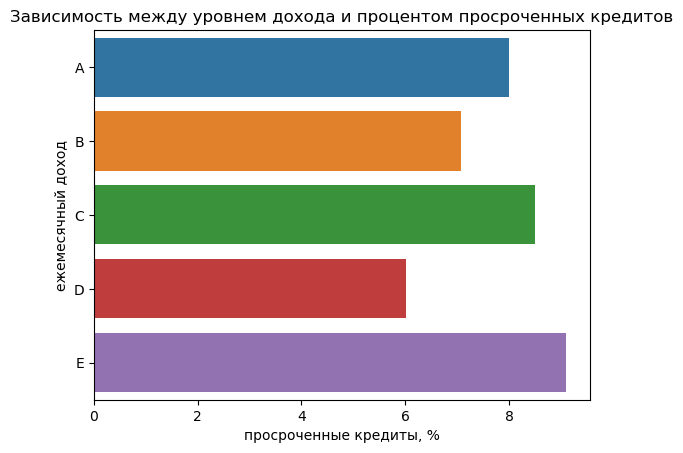

In [23]:
data_pivot_income=data.pivot_table(index=['total_income_category'],  values='debt',  aggfunc=['sum','count', 'mean'])
data_pivot_children=data.pivot_table(index=['total_income_category'],  values='children',  aggfunc=['sum'])
data_pivot_total= data_pivot_income.merge(data_pivot_children, on='total_income_category', how='left').reset_index()
data_pivot_total.columns =['ежемесячный доход','просроченные кредиты, количество', 'просроченные кредиты, сумма', 'просроченные кредиты, %', 'дети, всего']
data_pivot_total['просроченные кредиты, %']=round((data_pivot_total['просроченные кредиты, %']*100),2)
display(data_pivot_total)

sns.barplot(x=data_pivot_total['просроченные кредиты, %'], y=data_pivot_total['ежемесячный доход'], orient = 'h')
plt.title("Зависимость между уровнем дохода и процентом просроченных кредитов");

**Вывод:** Из приведённых данных самыми надёжными  являются заёмщики, состоящие в официальном браке в настоящее время  или ранее .
При исследовании зависимости уровня ежемесячного дохода заёмщика и возврата кредита в срок, наиболее надёжными заёмщиками являются 

категории B c доходом 200001–1000000 и D 30001–50000, где доля просроченных кредитов составляет 6,0-7,0%. 
Менее надёжными показали себя заёмщики категории А  с доходом 1000001 и выше и С с ежемесячным доходом 50001-200000, процент 
задержки в возврате кредита в этих группах 8,0-8,4%.
При этом категорией с самым большим процентов просроченных кредитов в размере 9% стала категория Е с самым низким  доходом 
0-30000.

На первый взгляд зависимость между  уровнем дохода и возвратом кредита не прослеживается напрямую и с учётом установленных 
категорий дохода носит волнообразный характер. При этом хотелось бы обратить внимание, что разбивка уровня доходов на категории 
установлена по ежемесячному доходу заёмщика без учёта количества членов его семьи. 

Как можно видеть в таблице выше,  категории заёмщиков В и С - самые большие как по  количеству кредитов, так и по количеству 
детей, а значит и членов семьи, которых заёмщик фактически содержит на свой доход. Для более объективной оценки зависимости 
дохода и возвратом кредита целесообразно было бы    рассчитать и использовать  в дальнейшем анализе доход на члена семьи 
Заёмщика. 

В таблице ниже видна прямая зависимость по снижению дохода на члена семьи с ростом количества детей, что  так же может говорить 
об увеличении риска невозврата кредита в срок при снижении  дохода на члена семьи, что требует дополнительного исследования.

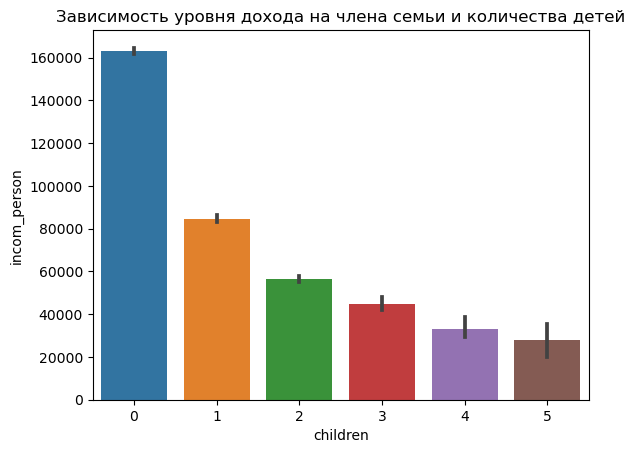

In [24]:
data['incom_person']=data['total_income']/(data['children']+1)
sns.barplot(data=data, y="incom_person", x="children", )
plt.title('Зависимость уровня дохода на члена семьи и количества детей');

#### 8.4 Как разные цели кредита влияют на его возврат в срок?

,цель получения кредита,"просроченные кредиты, количество","просроченные кредиты, сумма","просроченные кредиты, %"
0,операции с автомобилем,400,4279,9.35
1,операции с недвижимостью,780,10751,7.26
2,получение образования,369,3988,9.25
3,проведение свадьбы,183,2313,7.91


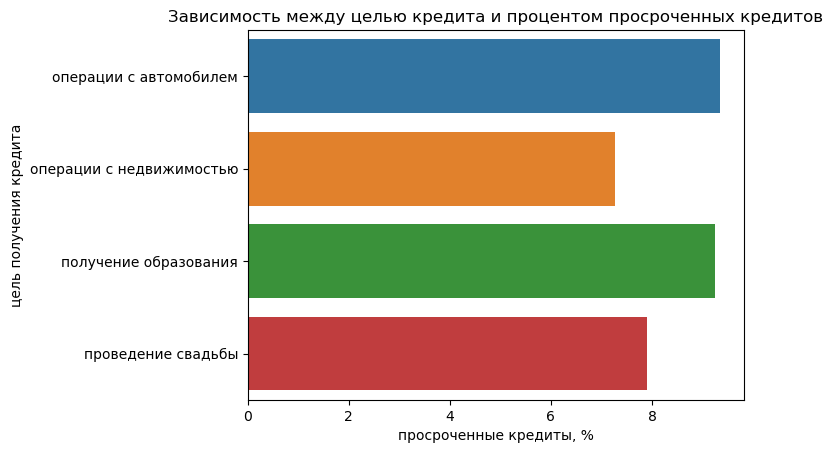

In [25]:
data_pivot_purpose=data.pivot_table(index=['purpose_category'],  values='debt',  aggfunc=['sum','count','mean']).reset_index()
data_pivot_purpose.columns =['цель получения кредита','просроченные кредиты, количество', 'просроченные кредиты, сумма', 'просроченные кредиты, %']
data_pivot_purpose['просроченные кредиты, %']=round((data_pivot_purpose['просроченные кредиты, %']*100),2)
display(data_pivot_purpose)

sns.barplot(x=data_pivot_purpose['просроченные кредиты, %'], y=data_pivot_purpose['цель получения кредита'], orient='h')
plt.title("Зависимость между целью кредита и процентом просроченных кредитов");
                    

**Вывод:** При исследовании влияния цели кредита на его возврат в срок самыми надёжными категориями являются операции с недвижимостью и проведение свадьбы, менее надёжными  - операции с автомобилем и получение образования.

### 9. Общий вывод.

Заказчик — кредитный отдел банка просил разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

По итогам исследования можно говорить о том, что  с ростом количества детей у заёмщика увеличивается риск просрочки им кредита, при этом наиболее надёжными заёмщиками являются состоящие в данный момент в официальном браке или состоящие в официальном браке ранее(вдовец\вдова, в разводе).

Дополнительно исследуя цели  кредита можно отметить меньшие риски невозврата для целей операций с недвижимостью и проведения свадьбы, и большие  - для операций с автомобилем и получения образования. Для снижения рисков в последних двух категориях одним из возможных решений могло бы стать страхование невозврата кредита.  

Анализ ежемесячного дохода заёмщика и риска невозврата не выявил зависимости этих двух факторов.  Но зависимость может быть выявлена при анализе такого показателя как  доход на члена семьи заёмщика и  риск невозврата кредита, что требует проведения дополнительного исследование.

Таким образом, наиболее привлекательным заёмщиком можно назвать заёмщика без детей,  вдовец\вдова,  с ежемесячным доходом 30001–50000 и берущим кредит на операции с недвижимостью.